### 1. Importing Dependancies

In [15]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                StratifiedKFold,
                                cross_validate
                                )
from sklearn.metrics import(
                            confusion_matrix
)

warnings.filterwarnings('ignore')

now we are trying to train multiple models with the base model we currently have to understand the performance

### 2. Loading the Data

In [2]:
X_train = np.load('artifacts\X_train.npz') ['arr_0']
Y_train = np.load('artifacts\Y_train.npz')  ['arr_0']
X_test = np.load('artifacts\X_test.npz')  ['arr_0']
Y_test = np.load('artifacts\Y_test.npz')  ['arr_0']

### 3. Define Multi Models

In [3]:
models = {
            'Logistic Regression' : LogisticRegression(),
            'Decision Tree' : DecisionTreeClassifier() ,
            'Random Forrest' : RandomForestClassifier()
        }

# this is a model dictionary that upper created by defining the models

### 4. Configure K-Fold CV

In [4]:
# cv = cross-validation

cv = StratifiedKFold(
                        n_splits=6,
                        random_state=42,
                        shuffle=True #by shuffling you make the operation more random, that means better performance
)

Now we are trying to do is that run the cross validation between these models

In [7]:
for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")
    
    cv_results = cross_validate(
                                model,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='f1',  # also fix this to use 'f1', beacuse dependig on f1 score is reliable rather than accuracy
                                return_estimator=True, #if you want to return the best model you can use this argument to 'True', only then you can get the best model
                                return_train_score=False
                                )  

    print(cv_results)  


Cross Validation on Logistic Regression
{'fit_time': array([0.04534125, 0.03025508, 0.02312899, 0.02361751, 0.02210426,
       0.02142715]), 'score_time': array([0.00300097, 0.00208926, 0.00201154, 0.00203371, 0.00200558,
       0.00219989]), 'estimator': [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()], 'test_score': array([0.73729216, 0.71280603, 0.73436765, 0.74063537, 0.72795851,
       0.7381733 ])}

Cross Validation on Decision Tree
{'fit_time': array([0.1048069 , 0.08733368, 0.08738422, 0.08663392, 0.08774376,
       0.08733296]), 'score_time': array([0.0075655 , 0.00409675, 0.00300837, 0.00206423, 0.00200295,
       0.00201368]), 'estimator': [DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier()], 'test_score': array([0.82214923, 0.81687529, 0.83119353, 0.82616822, 0.83074022,
       0.82961557

In [ ]:
#we are creating a object(dic) called traiend models
trained_models = {}

for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")
    
    cv_results = cross_validate(
                                model,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='f1',  # also fix this to use 'f1', beacuse dependig on f1 score is reliable rather than accuracy
                                return_estimator=True, #if you want to return the best model you can use this argument to 'True', only then you can get the best model
                                return_train_score=False
                                )  

    test_scores = cv_results['test_score']
    print(test_scores) 
     
    best_index = np.argmax(test_scores)
    
    estimator = cv_results ['estimator'] [best_index] #from this we are getting the indexes
    trained_models[model_name] = estimator #we are using 'model_name' as the key and 'trained_models' as the value. so we are using this to obtain the best models from each 3 types
    print(estimator)


Cross Validation on Logistic Regression
[0.73729216 0.71280603 0.73436765 0.74063537 0.72795851 0.7381733 ]
LogisticRegression()

Cross Validation on Decision Tree
[0.82933709 0.81081081 0.84011353 0.83341154 0.83497884 0.8269322 ]
DecisionTreeClassifier()

Cross Validation on Random Forrest
[0.89811321 0.89531028 0.88679245 0.88361045 0.89024965 0.89700997]
RandomForestClassifier()


In [ ]:
trained_models # there are the best models from each 3 types

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forrest': RandomForestClassifier()}

In [ ]:
# we need to find out the predicted models before confusion matrix

Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Decision Tree': array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 'Random Forrest': array([0, 0, 0, ..., 1, 0, 1], dtype=int64)}

In [ ]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forrest'])

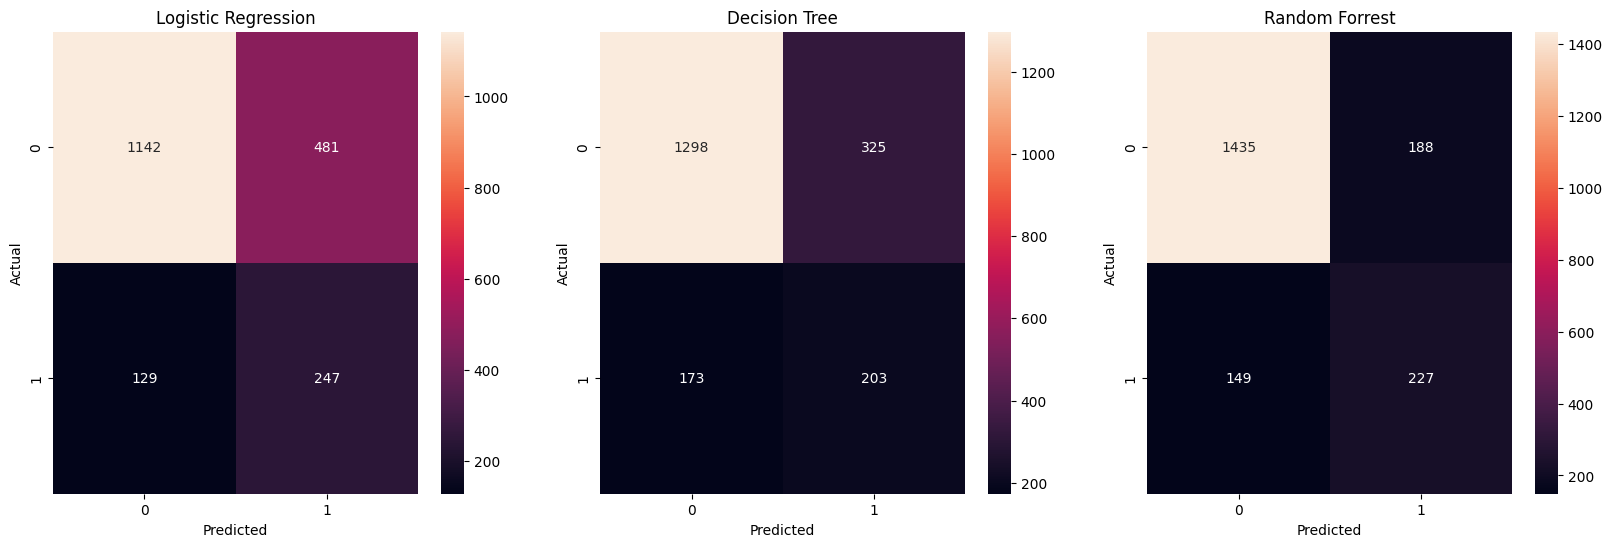

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forrest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.show()

model performance is overall not that good, but comparing to these 3 'Random Forrest' is better.